## Libreta sobre Titanic
### 25 de Mayo del 2020, Practicando para obtener mejor información

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv',index_col=0)
titanic_2 = pd.read_csv('test.csv',index_col=0)

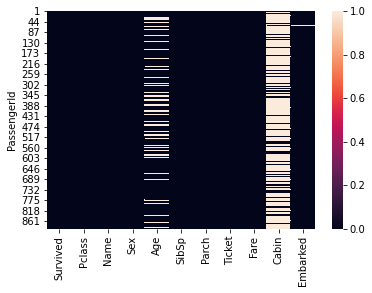

In [3]:
sns.heatmap(titanic.isnull())

In [4]:
new = titanic.groupby(['Pclass','Sex']).mean()

In [5]:
def change(columna):
    Pclass = columna[1]
    Sex = columna[2]
    Age = columna[0]
    if pd.isnull(Age):
        return new.loc[Pclass,Sex]['Age']
    else:
        return Age

In [6]:
titanic['Age'] = titanic[['Age','Pclass','Sex']].apply(change,axis=1)

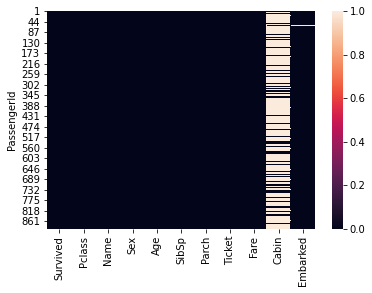

In [7]:
sns.heatmap(titanic.isnull())

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
titanic.drop('Cabin',axis=1, inplace=True)
titanic[titanic['Embarked'].isnull()]
titanic.drop([62,830],inplace=True)

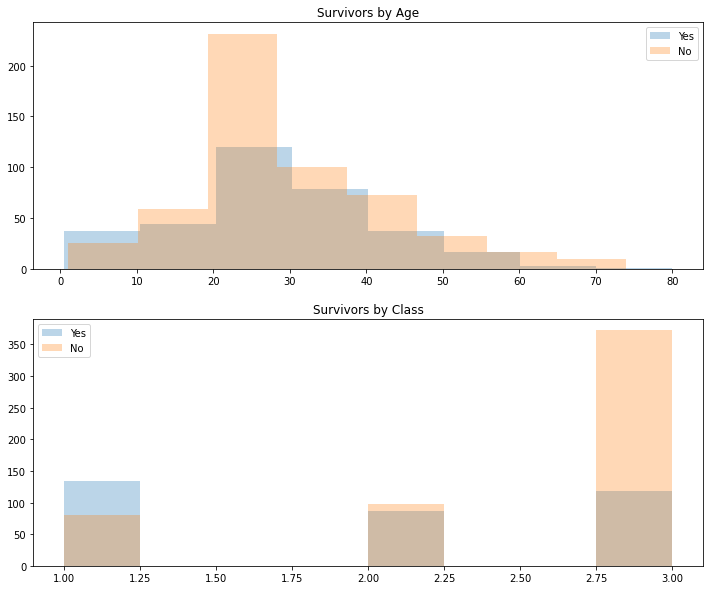

In [10]:
fig,ax= plt.subplots(2,figsize=(12,10))
ax[0].hist(titanic[titanic['Survived']==1]['Age'],alpha=.3,bins=8, label='Yes',)
ax[0].hist(titanic[titanic['Survived']==0]['Age'],alpha=0.3,bins=8, label='No')
ax[0].title.set_text('Survivors by Age')
ax[0].legend()
ax[1].hist(titanic[titanic['Survived']==1]['Pclass'],alpha=.3,bins=8, label='Yes',)
ax[1].hist(titanic[titanic['Survived']==0]['Pclass'],alpha=0.3,bins=8, label='No')
ax[1].title.set_text('Survivors by Class')
ax[1].legend()

In [11]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
titanic[['Ticket','Survived','Pclass']].groupby(titanic['Ticket']).mean().corr()

,Survived,Pclass
Survived,1.000000,-0.309273
Pclass,-0.309273,1.000000


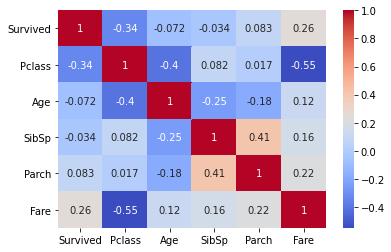

In [13]:
sns.heatmap(titanic.corr(),cmap='coolwarm',annot=True)

In [14]:
Pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)

In [15]:
titanic.drop('Pclass',axis=1,inplace=True)

In [16]:
titanic =titanic.join(Pclass)

In [17]:
Sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [18]:
titanic.drop('Sex',inplace=True,axis=1)

In [19]:
titanic = titanic.join(Sex)

In [20]:
Embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
titanic.drop('Embarked',axis=1,inplace=True)
titanic = titanic.join(Embark)

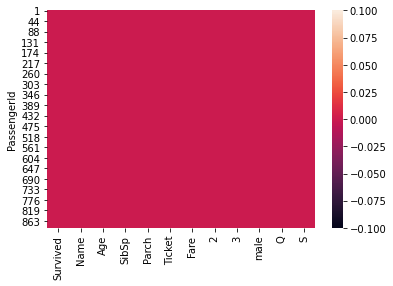

In [21]:
sns.heatmap(titanic.isnull())

In [22]:
titanic_train_data = titanic.drop(['Ticket','Name','Survived'],axis=1)
titanic_target = titanic['Survived']

# Primero me interesa ver la relación entre variables
### Despues haremos regresión logística para evaluar la respuesta binaria

1.- Hay que trabajar en escalar los datos

2.- Aprovecharemos esto para descomponer la matriz en sus dos principales componentes



In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scalar = StandardScaler()

In [25]:
numeric_titanic = titanic.drop(['Name','Ticket','Survived'],axis=1)

In [26]:
scalar.fit(numeric_titanic)

StandardScaler()

In [27]:
info_escalada = scalar.transform(numeric_titanic)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
pca.fit(info_escalada)

PCA(n_components=2)

In [31]:
x_pca = pca.transform(info_escalada)

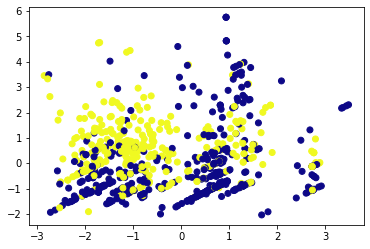

In [32]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=titanic['Survived'],cmap='plasma')

## Nada interesante aquí

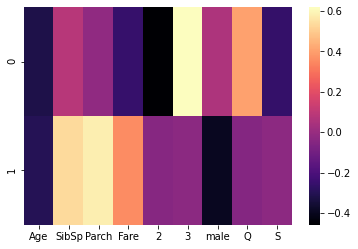

In [33]:
sns.heatmap(pd.DataFrame(pca.components_,columns=numeric_titanic.keys()),cmap='magma')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(info_escalada, titanic_target, test_size=0.3, random_state=111)
Lr = LogisticRegression(max_iter=1000)
Lr.fit(X_train,y_train)
predict = Lr.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[146  17]
 [ 25  79]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       163
           1       0.82      0.76      0.79       104

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

